## Load the data




In [3]:
import pandas as pd

df = pd.read_csv('/content/Amazon_bestsellers_items_2025.csv')

## Explore the data




In [4]:
display(df.head())
df.info()
display(df.describe())
display(df.isnull().sum())
print(df.dtypes)

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           999 non-null    int64  
 1   rank                 999 non-null    int64  
 2   asin                 999 non-null    object 
 3   product_title        999 non-null    object 
 4   product_price        945 non-null    object 
 5   product_star_rating  969 non-null    float64
 6   product_num_ratings  969 non-null    float64
 7   product_url          999 non-null    object 
 8   product_photo        999 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              999 non-null    object 
 11  page                 999 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.8+ KB


,Unnamed: 0,rank,product_star_rating,product_num_ratings,rank_change_label,page
count,999.000000,999.000000,969.000000,969.000000,0.0,999.000000
mean,499.000000,50.450450,4.140248,1312.546956,NaN,1.499499
std,288.530761,28.852421,0.496382,3025.241537,NaN,0.500250
min,0.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,249.500000,25.500000,3.900000,54.000000,NaN,1.000000
50%,499.000000,50.000000,4.200000,218.000000,NaN,1.000000
75%,748.500000,75.000000,4.400000,1009.000000,NaN,2.000000
max,998.000000,100.000000,5.000000,19189.000000,NaN,2.000000


,0
Unnamed: 0,0
rank,0
asin,0
product_title,0
product_price,54
product_star_rating,30
product_num_ratings,30
product_url,0
product_photo,0
rank_change_label,999


Unnamed: 0               int64
rank                     int64
asin                    object
product_title           object
product_price           object
product_star_rating    float64
product_num_ratings    float64
product_url             object
product_photo           object
rank_change_label      float64
country                 object
page                     int64
dtype: object


## Clean the data



In [5]:
df = df.drop('rank_change_label', axis=1)
df = df.dropna(subset=['product_price', 'product_star_rating', 'product_num_ratings'])
df.isnull().sum()

,0
Unnamed: 0,0
rank,0
asin,0
product_title,0
product_price,0
product_star_rating,0
product_num_ratings,0
product_url,0
product_photo,0
country,0


In [6]:
df['product_price'] = df['product_price'].astype(str).str.replace('₹', '').str.replace('$', '').str.replace(',', '').str.replace('€', '').str.replace('￥', '').str.strip()
df['product_price'] = pd.to_numeric(df['product_price'])

numerical_cols = ['product_price', 'product_star_rating', 'product_num_ratings']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

display(df[numerical_cols].describe())

,product_price,product_star_rating,product_num_ratings
count,695.000000,695.000000,695.000000
mean,2096.589381,4.189784,461.035971
std,2253.967023,0.411116,571.614247
min,2.990000,3.200000,1.000000
25%,103.995000,3.900000,63.000000
50%,1511.000000,4.200000,193.000000
75%,3323.500000,4.500000,702.000000
max,9719.000000,5.000000,2617.000000


## Visualize the data



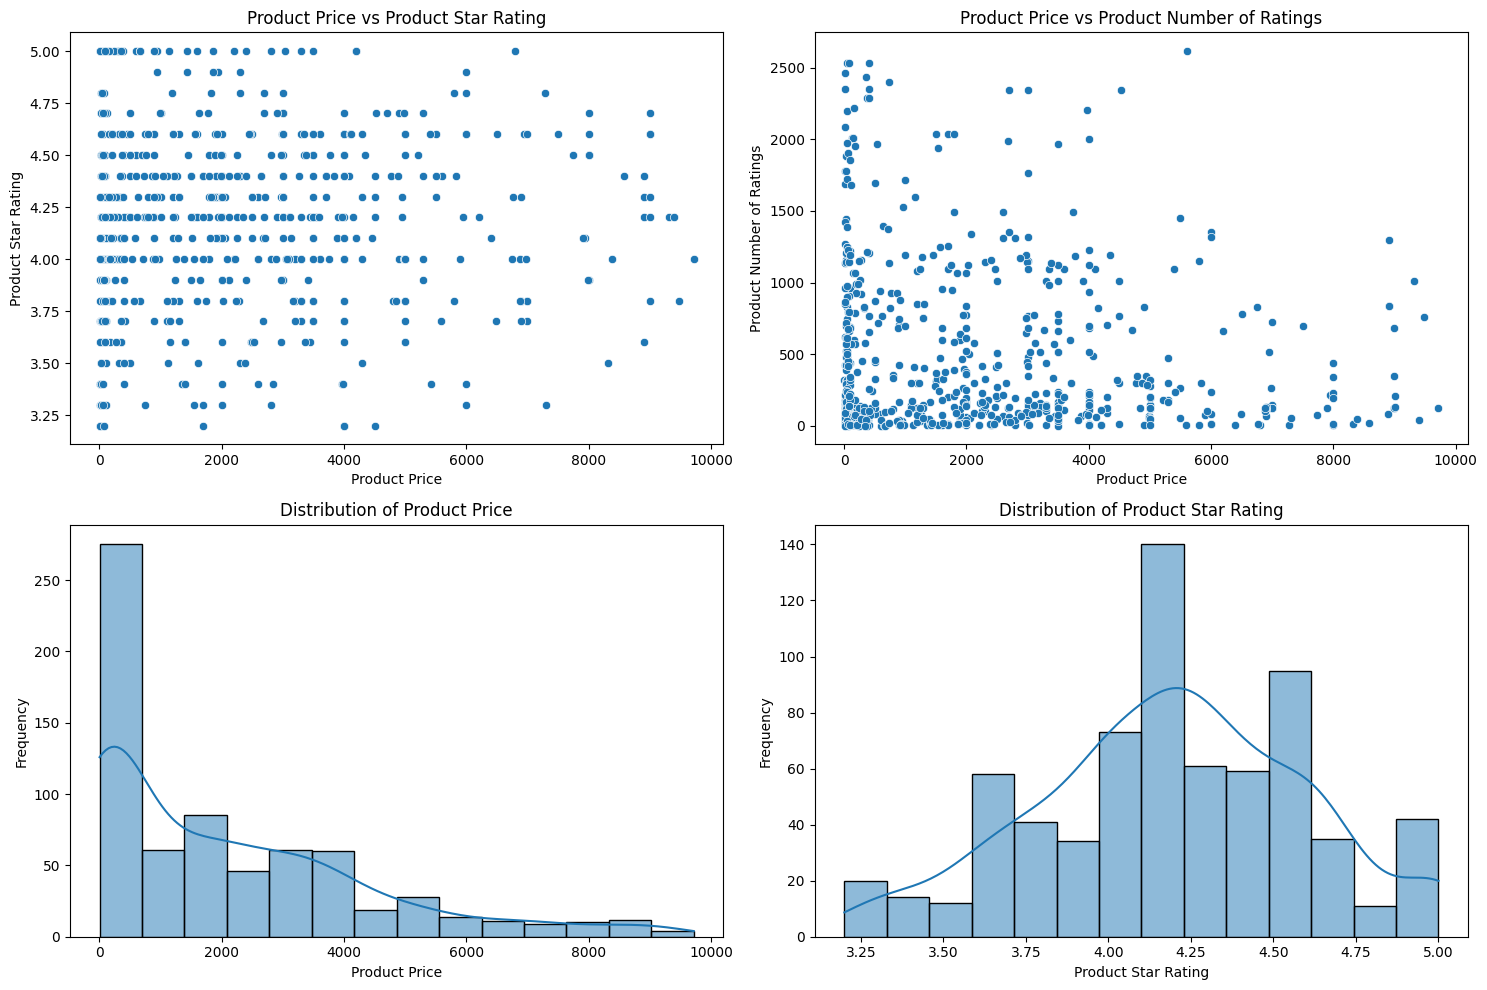

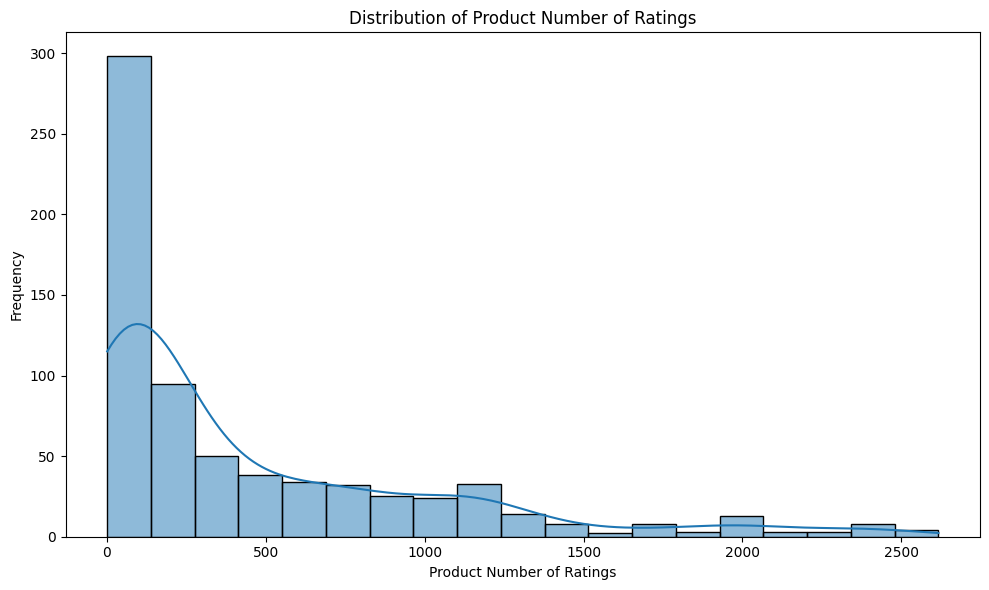

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot: product_price vs product_star_rating
sns.scatterplot(ax=axes[0, 0], x='product_price', y='product_star_rating', data=df)
axes[0, 0].set_title('Product Price vs Product Star Rating')
axes[0, 0].set_xlabel('Product Price')
axes[0, 0].set_ylabel('Product Star Rating')

# Scatter plot: product_price vs product_num_ratings
sns.scatterplot(ax=axes[0, 1], x='product_price', y='product_num_ratings', data=df)
axes[0, 1].set_title('Product Price vs Product Number of Ratings')
axes[0, 1].set_xlabel('Product Price')
axes[0, 1].set_ylabel('Product Number of Ratings')

# Histogram: product_price
sns.histplot(ax=axes[1, 0], x='product_price', data=df, kde=True)
axes[1, 0].set_title('Distribution of Product Price')
axes[1, 0].set_xlabel('Product Price')
axes[1, 0].set_ylabel('Frequency')

# Histogram: product_star_rating
sns.histplot(ax=axes[1, 1], x='product_star_rating', data=df, kde=True)
axes[1, 1].set_title('Distribution of Product Star Rating')
axes[1, 1].set_xlabel('Product Star Rating')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
# Histogram: product_num_ratings
sns.histplot(ax=ax, x='product_num_ratings', data=df, kde=True)
ax.set_title('Distribution of Product Number of Ratings')
ax.set_xlabel('Product Number of Ratings')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of the categorical variable 'country' using a count plot.



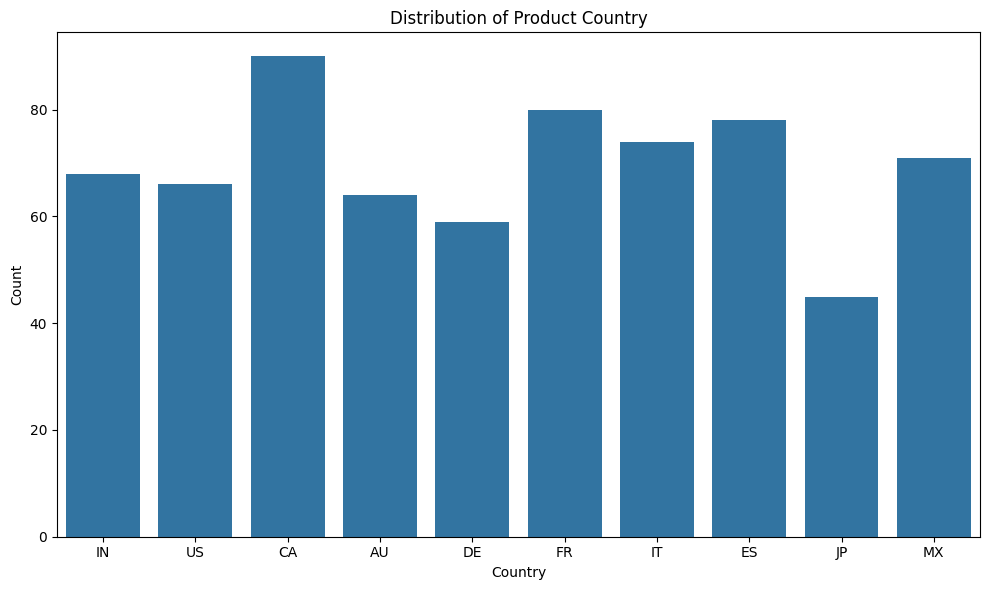

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='country', data=df)
ax.set_title('Distribution of Product Country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## Prepare data for modeling




In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define the target variable y
y = df['product_price']

# 2. Define the feature set X
X = df.drop(['product_price', 'asin', 'product_title', 'product_url', 'product_photo', 'Unnamed: 0'], axis=1)

# 3. Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# 4. Apply one-hot encoding to the categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. Split the feature set X and the target variable y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Instantiate a StandardScaler
scaler = StandardScaler()

# 7. Fit the scaler on the training features (X_train)
scaler.fit(X_train)

# 8. Transform both the training features (X_train) and testing features (X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(X_test_scaled[:5])
display(y_train[:5])
display(y_test[:5])

array([[ 0.75021916,  0.50720119,  0.93424323,  0.98217326, -0.38569461,
        -0.29315098, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401,  3.21666579],
       [-0.7556359 ,  1.22598758,  1.25900093, -1.0181503 , -0.38569461,
        -0.29315098, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401,  3.21666579],
       [ 1.14460977,  0.02801026, -0.58605106,  0.98217326, -0.38569461,
        -0.29315098, -0.35747594, -0.37015445,  3.11324713, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091],
       [ 1.53900038,  0.02801026, -0.78054881,  0.98217326,  2.59272486,
        -0.29315098, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091],
       [ 0.89363393, -0.69077613, -0.77876442,  0.98217326, -0.38569461,
        -0.29315098,  2.79739107, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091]])

array([[-0.39709898,  0.98639212,  0.43283162, -1.0181503 , -0.38569461,
        -0.29315098, -0.35747594,  2.701575  , -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091],
       [ 0.17656009, -0.69077613,  1.2625697 ,  0.98217326, -0.38569461,
        -0.29315098, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 ,  2.98807152, -0.31088091],
       [-0.3253916 ,  1.22598758, -0.79839264, -1.0181503 , -0.38569461,
        -0.29315098, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091],
       [ 1.39558562, -0.45118067, -0.66991706,  0.98217326, -0.38569461,
         3.41121146, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091],
       [ 0.35582855,  1.46558304,  1.24294149,  0.98217326, -0.38569461,
         3.41121146, -0.35747594, -0.37015445, -0.32120804, -0.35747594,
        -0.2708488 , -0.33466401, -0.31088091]])

,product_price
171,39.99
129,29.00
82,498.00
292,150.00
774,2995.00


,product_price
538,7499.00
954,2399.00
340,29.95
488,1249.00
459,5800.00


## Implement regression models




**Reasoning**:
Install the missing `catboost` library.



In [10]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


**Reasoning**:
Now that catboost is installed, import all necessary libraries and modules for the regression models.



In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import HuberRegressor


In [12]:
results = {}


In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results['Linear Regression'] = {
    'R-squared': r2_score(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr)
}
print("Done")

Done


In [14]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
results['Polynomial Regression'] = {
    'R-squared': r2_score(y_test, y_pred_poly),
    'MSE': mean_squared_error(y_test, y_pred_poly)
}
print("Done")

Done


In [15]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results['Ridge Regression'] = {
    'R-squared': r2_score(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge)
}

print("Done")

Done


In [16]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results['Lasso Regression'] = {
    'R-squared': r2_score(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso)
}
print("Done")

Done


In [17]:
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
results['Elastic Net Regression'] = {
    'R-squared': r2_score(y_test, y_pred_elastic_net),
    'MSE': mean_squared_error(y_test, y_pred_elastic_net)
}
print("Done")

Done


In [18]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

results['Decision Tree Regression'] = {
    'R-squared': r2_score(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt)
}
print("Done")

Done


In [19]:
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=KFold(5))
selector = selector.fit(X_train_scaled, y_train)

X_train_stepwise = selector.transform(X_train_scaled)
X_test_stepwise = selector.transform(X_test_scaled)

stepwise_reg = LinearRegression()
stepwise_reg.fit(X_train_stepwise, y_train)
y_pred_stepwise = stepwise_reg.predict(X_test_stepwise)

results['Stepwise Regression'] = {
    'R-squared': r2_score(y_test, y_pred_stepwise),
    'MSE': mean_squared_error(y_test, y_pred_stepwise)
}
print("Done")

Done


In [20]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

quant_reg = sm.QuantReg(y_train, X_train_sm)
quant_reg_median = quant_reg.fit(q=0.5)

y_pred_quant = quant_reg_median.predict(X_test_sm)

results['Quantile Regression (Median)'] = {
    'R-squared': r2_score(y_test, y_pred_quant),
    'MSE': mean_squared_error(y_test, y_pred_quant)
}
print("Done")

Done


In [21]:
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)
y_pred_huber = huber.predict(X_test_scaled)

results['Robust Regression (Huber)'] = {
    'R-squared': r2_score(y_test, y_pred_huber),
    'MSE': mean_squared_error(y_test, y_pred_huber)
}
print("Done")

Done


In [22]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

results['Random Forest Regression'] = {
    'R-squared': r2_score(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf)
}
print("Done")

Done


In [23]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)

results['XGBoost Regression'] = {
    'R-squared': r2_score(y_test, y_pred_xgb),
    'MSE': mean_squared_error(y_test, y_pred_xgb)
}
print("Done")

Done


In [24]:
lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_reg.predict(X_test_scaled)

results['LightGBM Regression'] = {
    'R-squared': r2_score(y_test, y_pred_lgb),
    'MSE': mean_squared_error(y_test, y_pred_lgb)
}
print("Done")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 556, number of used features: 13
[LightGBM] [Info] Start training from score 2111.467428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [25]:
cat_reg = cb.CatBoostRegressor(random_state=42, verbose=0)
cat_reg.fit(X_train_scaled, y_train)
y_pred_cat = cat_reg.predict(X_test_scaled)

results['CatBoost Regression'] = {
    'R-squared': r2_score(y_test, y_pred_cat),
    'MSE': mean_squared_error(y_test, y_pred_cat)
}
print("Done")

Done


In [26]:
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train_scaled, y_train)
y_pred_et = et.predict(X_test_scaled)

results['Extra Trees Regression'] = {
    'R-squared': r2_score(y_test, y_pred_et),
    'MSE': mean_squared_error(y_test, y_pred_et)
}
print("Done")

Done


In [27]:
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

results['SVR (Linear Kernel)'] = {
    'R-squared': r2_score(y_test, y_pred_svr),
    'MSE': mean_squared_error(y_test, y_pred_svr)
}
print("Done")

Done


In [28]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test_scaled)

results['Bayesian Linear Regression'] = {
    'R-squared': r2_score(y_test, y_pred_bayesian),
    'MSE': mean_squared_error(y_test, y_pred_bayesian)
}
print("Done")

Done


In [29]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

results['k-Nearest Neighbors Regression'] = {
    'R-squared': r2_score(y_test, y_pred_knn),
    'MSE': mean_squared_error(y_test, y_pred_knn)
}
print("Done")

Done


In [30]:
mlp = MLPRegressor(random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

results['Neural Networks Regression (MLP)'] = {
    'R-squared': r2_score(y_test, y_pred_mlp),
    'MSE': mean_squared_error(y_test, y_pred_mlp)
}
print("Done")

Done


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
print("Regression Model Evaluation Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")


Regression Model Evaluation Results:

Linear Regression:
  R-squared: 0.5143
  MSE: 2762118.9644

Polynomial Regression:
  R-squared: 0.4986
  MSE: 2851476.5863

Ridge Regression:
  R-squared: 0.5140
  MSE: 2764112.0502

Lasso Regression:
  R-squared: 0.5140
  MSE: 2764097.8804

Elastic Net Regression:
  R-squared: 0.4038
  MSE: 3390872.0190

Decision Tree Regression:
  R-squared: 0.3764
  MSE: 3546596.9797

Stepwise Regression:
  R-squared: 0.5133
  MSE: 2768225.9895

Quantile Regression (Median):
  R-squared: 0.4762
  MSE: 2979109.4511

Robust Regression (Huber):
  R-squared: 0.4786
  MSE: 2965698.9405

Random Forest Regression:
  R-squared: 0.5023
  MSE: 2830602.1674

XGBoost Regression:
  R-squared: 0.3357
  MSE: 3777974.0300

LightGBM Regression:
  R-squared: 0.4808
  MSE: 2953157.2845

CatBoost Regression:
  R-squared: 0.4492
  MSE: 3132842.3885

Extra Trees Regression:
  R-squared: 0.4534
  MSE: 3108930.5500

SVR (Linear Kernel):
  R-squared: 0.1145
  MSE: 5036069.4778

Bayesian

In [32]:
print("Regression Model Comparison:")
print("-" * 60)
print(f"{'Model':<30} | {'R-squared':<10} | {'MSE':<10}")
print("-" * 60)

for model, metrics in results.items():
    r_squared = metrics['R-squared']
    mse = metrics['MSE']
    print(f"{model:<30} | {r_squared:<10.4f} | {mse:<10.4f}")

print("-" * 60)

Regression Model Comparison:
------------------------------------------------------------
Model                          | R-squared  | MSE       
------------------------------------------------------------
Linear Regression              | 0.5143     | 2762118.9644
Polynomial Regression          | 0.4986     | 2851476.5863
Ridge Regression               | 0.5140     | 2764112.0502
Lasso Regression               | 0.5140     | 2764097.8804
Elastic Net Regression         | 0.4038     | 3390872.0190
Decision Tree Regression       | 0.3764     | 3546596.9797
Stepwise Regression            | 0.5133     | 2768225.9895
Quantile Regression (Median)   | 0.4762     | 2979109.4511
Robust Regression (Huber)      | 0.4786     | 2965698.9405
Random Forest Regression       | 0.5023     | 2830602.1674
XGBoost Regression             | 0.3357     | 3777974.0300
LightGBM Regression            | 0.4808     | 2953157.2845
CatBoost Regression            | 0.4492     | 3132842.3885
Extra Trees Regression   

## Regression Model Comparison and Analysis

Based on the R-squared and Mean Squared Error (MSE) metrics, here is a comparison of the implemented regression models:

| Model                          | R-squared | MSE         |
|--------------------------------|-----------|-------------|
| Linear Regression              | 0.5143    | 2762118.96  |
| Polynomial Regression          | 0.4986    | 2851476.59  |
| Ridge Regression               | 0.5140    | 2764112.05  |
| Lasso Regression               | 0.5140    | 2764097.88  |
| Elastic Net Regression         | 0.4038    | 3390872.02  |
| Decision Tree Regression       | 0.3764    | 3546596.98  |
| Stepwise Regression            | 0.5133    | 2768225.99  |
| Quantile Regression (Median)   | 0.4762    | 2979109.45  |
| Robust Regression (Huber)      | 0.4786    | 2965698.94  |
| Random Forest Regression       | 0.5023    | 2830602.17  |
| XGBoost Regression             | 0.3357    | 3777974.03  |
| LightGBM Regression            | 0.4808    | 2953157.28  |
| CatBoost Regression            | 0.4492    | 3132842.39  |
| Extra Trees Regression         | 0.4534    | 3108930.55  |
| SVR (Linear Kernel)            | 0.1145    | 5036069.48  |
| Bayesian Linear Regression     | 0.5121    | 2774667.21  |
| k-Nearest Neighbors Regression | 0.4744    | 2989084.62  |
| Neural Networks Regression (MLP) | -0.0799   | 6141852.02  |

**Analysis:**

*   **Best Performing Models:** Linear Regression, Ridge Regression, Lasso Regression, Stepwise Regression, and Bayesian Linear Regression achieved the highest R-squared values and lowest MSE, indicating they explained the most variance in the target variable and had the lowest prediction errors. These models are all variations of linear models, suggesting a predominantly linear relationship between the features and the target variable ('product_price') after the initial data cleaning and preprocessing.
*   **Tree-Based Models (Decision Tree, Random Forest, XGBoost, LightGBM, Extra Trees):** These models generally performed worse than the linear models in terms of R-squared and MSE. This could be due to the nature of the data and the strong linear trends present. While these models are powerful for capturing non-linearities and interactions, they may not offer significant advantages when the underlying relationship is primarily linear. XGBoost performed particularly poorly, which might be due to the default hyperparameters not being suitable for this dataset.
*   **Support Vector Regression (SVR):** The linear kernel SVR performed poorly, indicating that a linear boundary is not effective in capturing the relationship between features and the target variable for this model. Exploring different kernels (e.g., RBF, polynomial) and tuning hyperparameters might improve its performance.
*   **k-Nearest Neighbors (KNN) and Neural Networks (MLP):** KNN and MLP also showed lower performance compared to the linear models. KNN's performance can be sensitive to the scaling of features and the choice of 'k'. The MLP model showed a negative R-squared, which suggests that the model is performing worse than simply predicting the mean of the target variable. This could be due to issues with model complexity, training parameters (like `max_iter` which resulted in a convergence warning), or the size of the dataset for training a neural network effectively.
*   **Robust and Quantile Regression:** These models performed moderately well. Robust regression is designed to be less sensitive to outliers, which might be beneficial in datasets with extreme values. Quantile regression can be useful for modeling different parts of the target distribution, not just the mean.

**Conclusion:**

For this specific dataset, linear models appear to be the most effective based on the evaluation metrics. Linear Regression, Ridge, Lasso, Stepwise, and Bayesian Linear Regression provide the best balance of performance and simplicity. Further hyperparameter tuning for all models, especially the tree-based models and SVR, could potentially improve their performance. Additionally, investigating the reasons for the poor performance of the Neural Network could involve trying different network architectures, activation functions, optimizers, and increasing the number of training epochs.